In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/diBimbing/Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6774,0970-QXPXW,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No
5864,5093-FEGLU,Female,0,Yes,No,47,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.65,921.55,No
2416,8982-NHAVY,Male,0,No,No,27,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),100.50,2673.45,No
1698,1298-PHBTI,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Two year,Yes,Electronic check,84.80,6152.4,No
2760,9534-NSXEM,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.65,595.5,No


In [ ]:
!pip install -U pandas-profiling
!pip install sweetviz
from ipywidgets import widgets
from pandas_profiling import ProfileReport
import sweetviz as sv
pandas_profiling_report = df.profile_report(
    title="Telco Churn Reports", 
    explorative=True, 
    html={'style': 
          {'full_width': True,
           'theme':'flatly'}
          }, 
    interactions = {'targets' : ['Churn']} , progress_bar=True)
pandas_profiling_report.to_file("Telco_Churn_Reports.html")
train_perc = 0.8
df = df.loc[:round(train_perc*len(df)),:]
df = df.loc[1+round(train_perc*len(df)):,:]
sweetviz_report = sv.compare([df, "Training Data"],[df, "Test Data"],"Churn")
sweetviz_report.show_html("sweetviz_Telco.html")

     |████████████████████████████████| 261 kB 4.1 MB/s 
     |████████████████████████████████| 675 kB 42.5 MB/s 
     |████████████████████████████████| 102 kB 10.6 MB/s 
     |████████████████████████████████| 303 kB 46.6 MB/s 
     |████████████████████████████████| 10.1 MB 36.0 MB/s 
     |████████████████████████████████| 3.1 MB 57.0 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
     |████████████████████████████████| 62 kB 876 kB/s 
     |████████████████████████████████| 812 kB 60.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6ba7c4cb64c1c2c25c1fa2209eb0e8ec0f00687d014269f175014af8f8493069
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=7ba9f54a1aa1c6fa1c223fec1a92284cc1c6eb88680625e35aee561b59c35650
 

     |████████████████████████████████| 15.1 MB 29 kB/s 


In [ ]:
from ipywidgets import widgets
from pandas_profiling import ProfileReport
import sweetviz as sv

In [ ]:
pandas_profiling_report = df.profile_report(
    title="Telco Churn Reports", 
    explorative=True, 
    html={'style': 
          {'full_width': True,
           'theme':'flatly'}
          }, 
    interactions = {'targets' : ['Churn']} , progress_bar=True)
pandas_profiling_report.to_file("Telco_Churn_Reports.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train_perc = 0.8
df = df.loc[:round(train_perc*len(df)),:]
df = df.loc[1+round(train_perc*len(df)):,:]

In [ ]:
sweetviz_report = sv.compare([df, "Training Data"],[df, "Test Data"],"Churn")
sweetviz_report.show_html("sweetviz_Telco.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_Telco.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


- Terdapat 7043 data dan dikelompokkan pada 21 kolom
- Target variable `Churn` dan kolom yang dapat di drop adalah `customerID`
- variable `TotalCharges` yang seharusny berupa float tetapi berisi object maka harus dirubah tipe datanya
- juga akan melakukan encoding pada variable `Churn`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- terdapat  `ValueError: could not convert string to float` pada saat melakukan perubahan tipe data , saat pengecekan terdapat variable yang terisi `space` pada `TotalCharge`
- maka di lakukan cleansing data terlebih dahulu

In [ ]:
df = df.sort_values(['TotalCharges'])
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x:0 if x==' ' else x)

In [ ]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x:'No' if x==0 else 'Yes')

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 936 to 2845
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object

- rata-rata 

In [ ]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("="*10)

Column: customerID
['5709-LVOEQ' '3213-VVOLG' '2520-SGTTA' ... '5899-MQZZL' '4536-PLEQY'
 '9093-FPDLG']
Column: gender
['Female' 'Male']
Column: SeniorCitizen
[0 1]
Column: Partner
['Yes' 'No']
Column: Dependents
['Yes' 'No']
Column: tenure
[ 0  5  1  6 12 55 20 39 48 29 53 40 51 10 13 54  3  2  4 15 18 21 52 47
 50 14 44 42 11 26 49 16 22 27 19 58 32 56 59 57 46 23 43 17 31 45 60 28
 33  7 62 61 36 24 30 35 63 68 67 64 65 66  8 25 69 71 70 72 37 34 41  9
 38]
Column: PhoneService
['Yes' 'No']
Column: MultipleLines
['No' 'Yes' 'No phone service']
Column: InternetService
['DSL' 'No' 'Fiber optic']
Column: OnlineSecurity
['Yes' 'No internet service' 'No']
Column: OnlineBackup
['Yes' 'No internet service' 'No']
Column: DeviceProtection
['Yes' 'No internet service' 'No']
Column: TechSupport
['No' 'No internet service' 'Yes']
Column: StreamingTV
['Yes' 'No internet service' 'No']
Column: StreamingMovies
['Yes' 'No internet service' 'No']
Column: Contract
['Two year' 'One year' 'Month-to-mon

- Dropping Columns `customerID`

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No


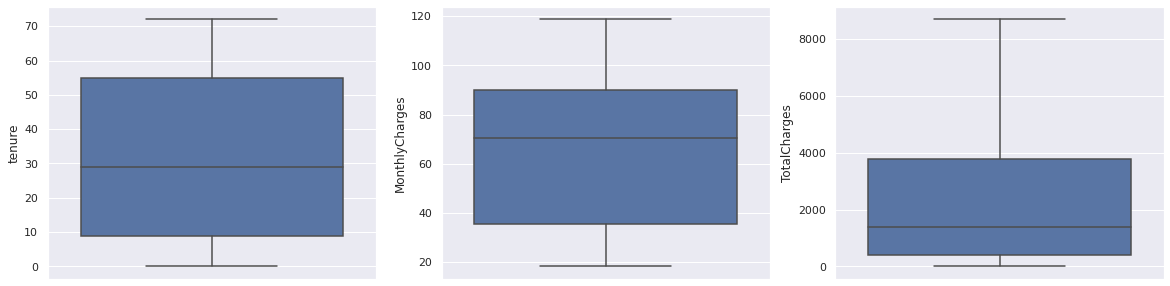

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
sns.boxplot(data=df, y='tenure', ax=ax[0])
sns.boxplot(data=df, y='MonthlyCharges', ax=ax[1])
sns.boxplot(data=df, y='TotalCharges', ax=ax[2])

- tidak ditemukanya outlier pada data

In [ ]:

# def label_encoder(list_column, data_set):
#     encoder = LabelEncoder()
    
#     copied_data = data_set
    
#     for item in list_column:
#         copied_data[item] = encoder.fit_transform(copied_data[item])
        
#     return copied_data

# list_encode = [item for item in col_names if item != 'CustomerID']

# data = label_encoder(list_encode, data)
# data.head(5)

NameError: ignored

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Churn']= label_encoder.fit_transform(df['Churn'])
df['Churn'].unique()

array([0, 1])

In [ ]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4631,Male,0,No,No,5,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,92.50,452.70,1
5723,Male,0,No,No,58,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),80.65,4807.35,0
3230,Male,0,Yes,Yes,63,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.55,1245.60,0
2747,Male,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,168.65,0
6506,Female,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.60,1115.20,1


In [ ]:
df['Churn'].describe()

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

- 70% lebih customer tidak `churn`

In [ ]:
df_corr = df.corr()
df_corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324
Churn,0.150889,-0.352229,0.193356,-0.198324,1.000000


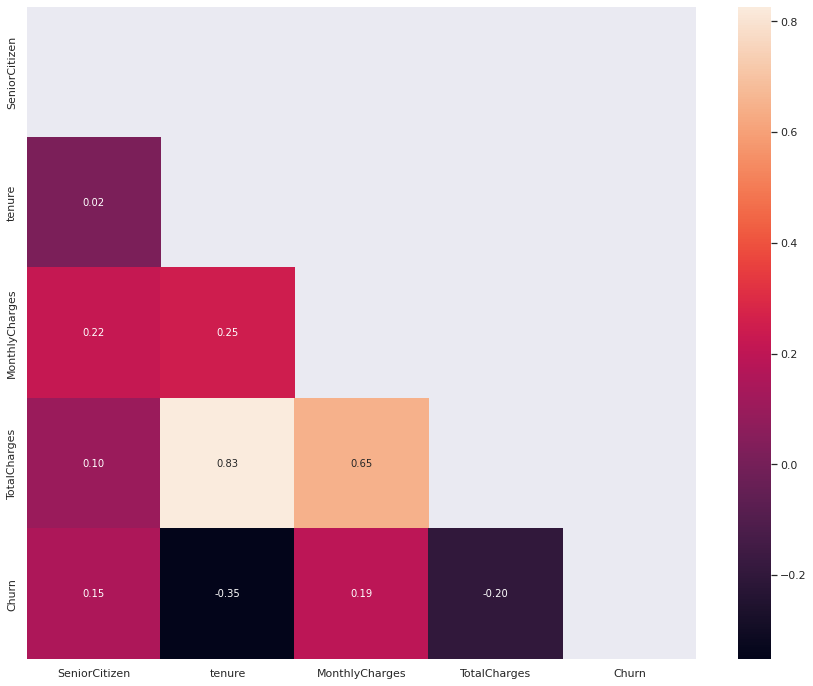

In [ ]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_corr,mask=mask,annot=True, annot_kws={'size':10}, fmt=".2f")
plt.show()

In [ ]:
df_cabin_analysis = df.copy()
df_cabin_analysis.groupby(['cabin'])[['Survived']].agg({'count','mean'})
df.groupby(['Pclass'])[['Survived']].agg({'count','mean'})
df.groupby(['Sex_1'])[['Survived']].agg({'count','mean'})

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


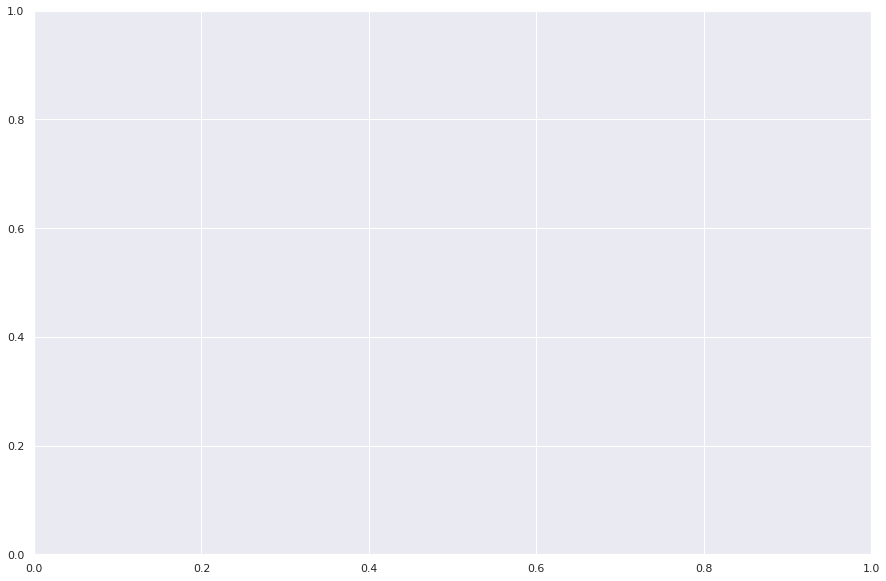

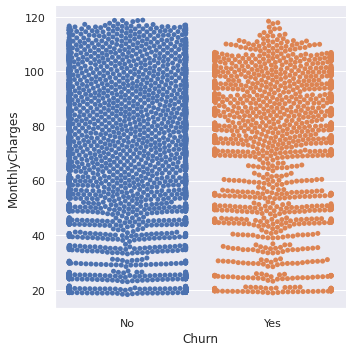

In [ ]:
sns.catplot(x="Churn", y="MonthlyCharges",kind="swarm",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


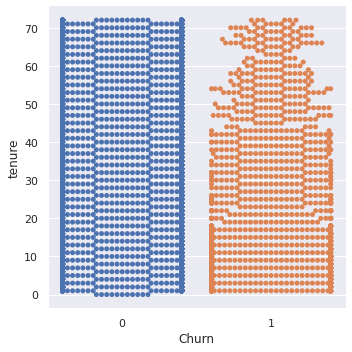

In [ ]:
sns.catplot(x="Churn", y="tenure",kind="swarm",data=df)

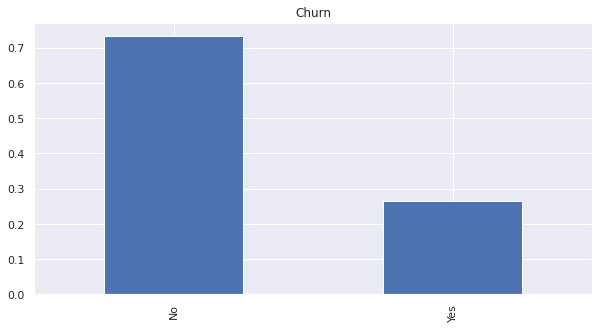

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
df['Churn'].value_counts(True).plot(kind='bar')
plt.title("Churn")
plt.xticks([0, 1],["No","Yes"])
plt.show()

([<matplotlib.axis.XTick at 0x7f6918dbcdd0>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

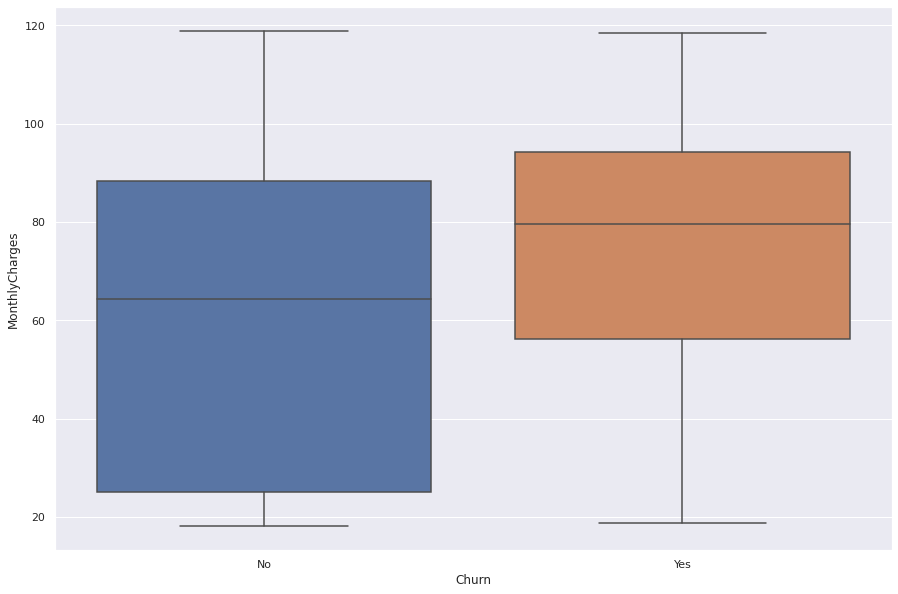

In [ ]:
ig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="Churn", y="MonthlyCharges",data=df)
plt.xticks([0, 1],["No","Yes"])

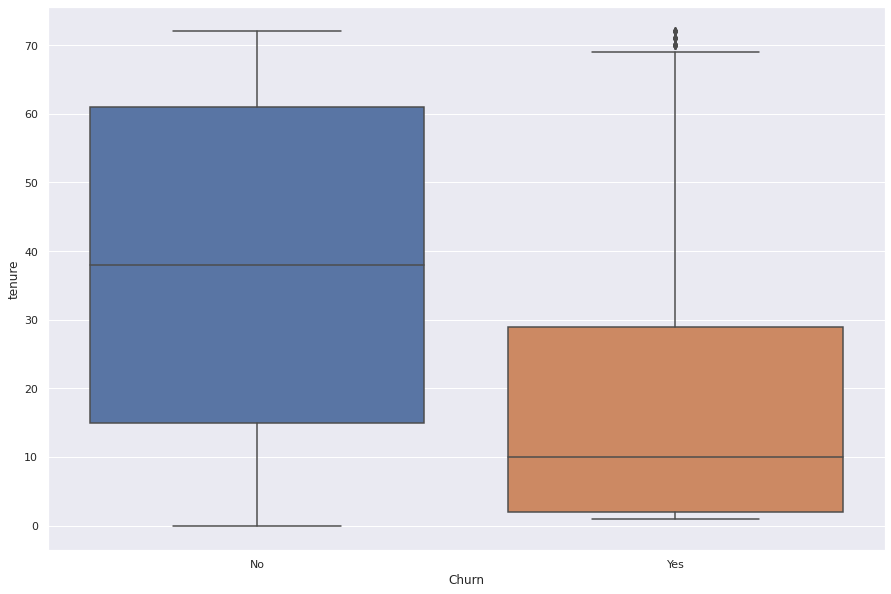

In [ ]:
ig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="Churn", y="tenure",data=df)
plt.xticks([0, 1],["No","Yes"])
plt.show()

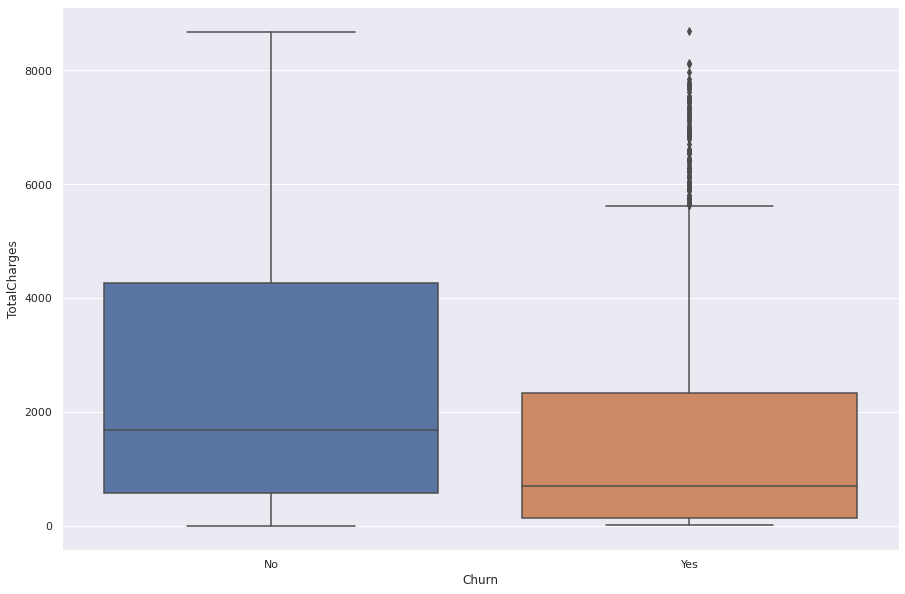

In [ ]:
ig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="Churn", y="TotalCharges",data=df)
plt.xticks([0, 1],["No","Yes"])
plt.show()

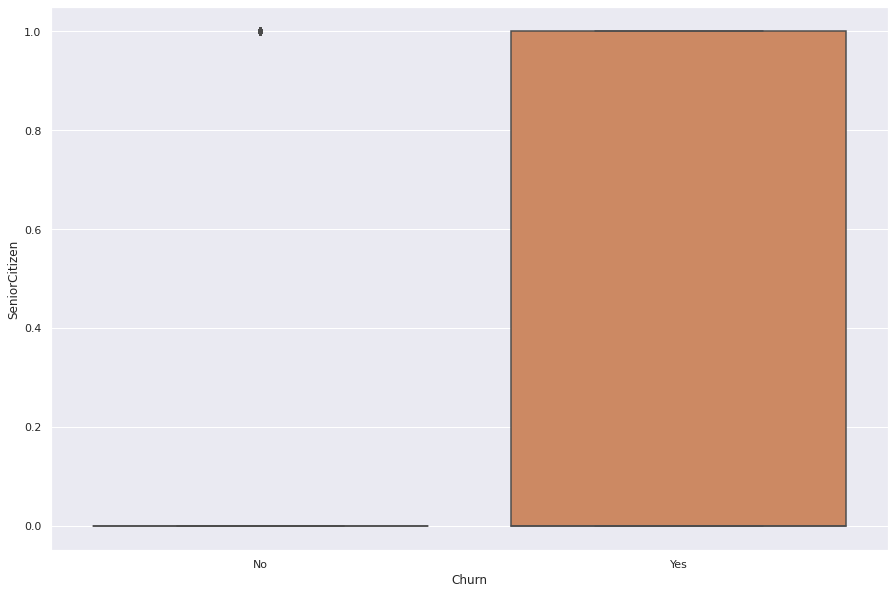

In [ ]:
ig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="Churn", y="SeniorCitizen",data=df)
plt.xticks([0, 1],["No","Yes"])
plt.show()

- kebanyakan user yang tidak `Churn` dari golongan relatif muda di bandingkan seniorcitizen (orangtua)

In [ ]:
df.groupby(['SeniorCitizen'])[['Churn']].agg({'count','mean'})

Churn      
                   mean count
SeniorCitizen                
0              0.236062  5901
1              0.416813  1142

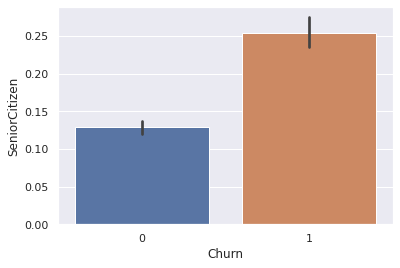

In [ ]:
sns.barplot(x = 'Churn',y='SeniorCitizen',data=df)

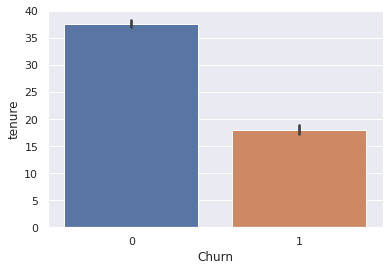

In [ ]:
sns.barplot(x = 'Churn',y='tenure',data=df)

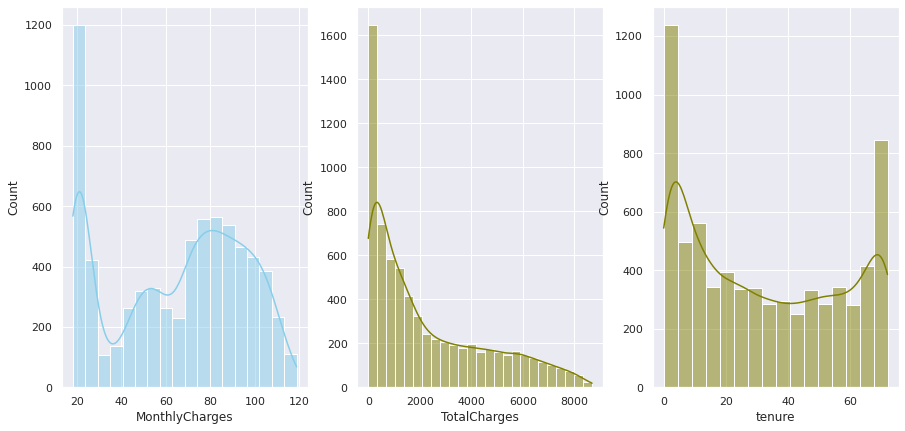

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
sns.histplot(data=df, x="MonthlyCharges", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="TotalCharges", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df, x="tenure", kde=True, color="olive", ax=axs[2])

plt.show()